In [207]:
import illustris_python.groupcat as gc
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [208]:
def load_summary(filename):
    dtype=[('FOFID', 'i8'),
           ('MFOF', 'f8'), 
           ('Mstar', 'f8'),
           ('vmax', 'f8'),
           ('x', 'f8'),
           ('y', 'f8'),
           ('z', 'f8'),
           ('vx', 'f8'),
           ('vy', 'f8'),
           ('vz', 'f8')]
    summary = np.loadtxt(filename, dtype=dtype)    
    return summary

In [209]:
galaxy_A = load_summary("../data/mstar_selected/summary_halo_A.txt")
galaxy_B = load_summary("../data/mstar_selected/summary_halo_B.txt")

In [210]:
vel_A = np.sqrt(galaxy_A['vx']**2 + galaxy_A['vy']**2 + galaxy_A['vz']**2)
vel_B = np.sqrt(galaxy_B['vx']**2 + galaxy_B['vy']**2 + galaxy_B['vz']**2)

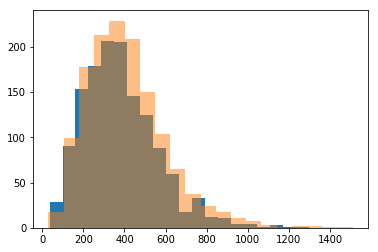

In [211]:
_ = plt.hist(vel_A, bins=20)
_ = plt.hist(vel_B, bins=20, alpha=0.5)

In [212]:
relative_pos = np.sqrt((galaxy_B['x']-galaxy_A['x'])**2+(galaxy_B['y']-galaxy_A['y'])**2+(galaxy_B['z']-galaxy_A['z'])**2)

relative_radial_vel = (galaxy_B['vx']-galaxy_A['vx'])*(galaxy_B['x']-galaxy_A['x'])+\
(galaxy_B['vy']-galaxy_A['vy'])*(galaxy_B['y']-galaxy_A['y'])+\
(galaxy_B['vz']-galaxy_A['vz'])*(galaxy_B['z']-galaxy_A['z'])

relative_radial_vel = relative_radial_vel/relative_pos
print(relative_pos.min()/0.678)
ii = ((galaxy_A['vmax'] < 250) & (galaxy_B['vmax']<250)) & (relative_radial_vel < 0)
jj = ((vel_A > 600) | (vel_B > 600)) & (relative_radial_vel < 0)
print(np.count_nonzero(ii))
print(np.count_nonzero(jj))

699.4389160961414
520
213


372.0544125804941 162.24124093693547
[207.57226188 358.84870023 526.3811029 ]


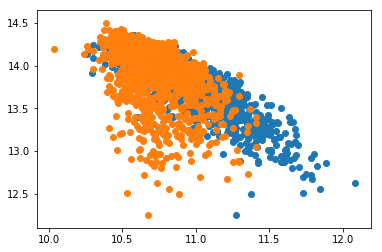

In [213]:
plt.scatter(np.log10(galaxy_A['Mstar']/0.68)+10, np.log10(galaxy_A['MFOF']/0.68)+10)
plt.scatter(np.log10(galaxy_B['Mstar']/0.68)+10, np.log10(galaxy_B['MFOF']/0.68)+10)
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))
print(np.percentile(vel_A[ii], [16,50,84]))

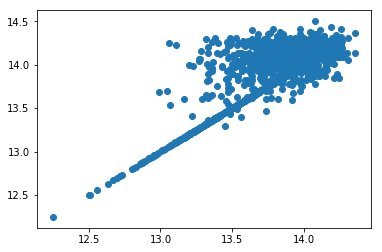

In [214]:
plt.scatter(np.log10(galaxy_A['MFOF']/0.68)+10, np.log10(galaxy_B['MFOF']/0.68)+10)

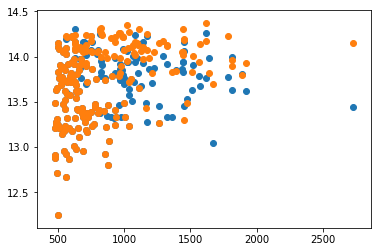

In [215]:
plt.scatter(relative_pos[jj], np.log10(galaxy_A['MFOF'][jj]/0.68)+10)
plt.scatter(relative_pos[jj], np.log10(galaxy_B['MFOF'][jj]/0.68)+10)

372.0544125804941 162.24124093693547
[207.57226188 358.84870023 526.3811029 ]


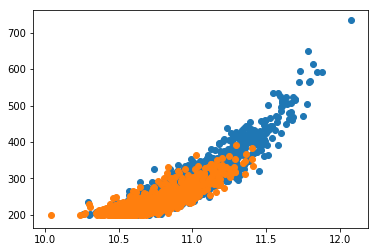

In [216]:
plt.scatter(np.log10(galaxy_A['Mstar']/0.68)+10, galaxy_A['vmax'])
plt.scatter(np.log10(galaxy_B['Mstar']/0.68)+10, galaxy_B['vmax'])
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))
print(np.percentile(vel_A[ii], [16,50,84]))

372.0544125804941 162.24124093693547
[207.57226188 358.84870023 526.3811029 ]


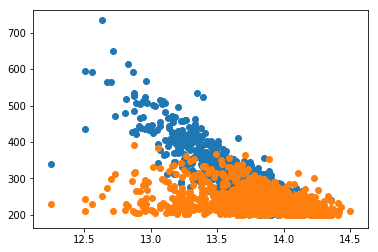

In [217]:
plt.scatter(np.log10(galaxy_A['MFOF']/0.68)+10, galaxy_A['vmax'])
plt.scatter(np.log10(galaxy_B['MFOF']/0.68)+10, galaxy_B['vmax'])
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))
print(np.percentile(vel_A[ii], [16,50,84]))

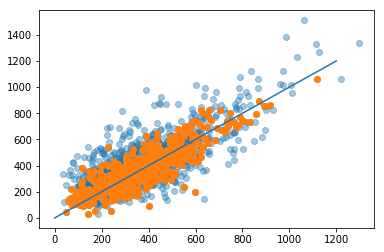

In [218]:
x=np.linspace(0,1200,10)
plt.scatter(vel_A, vel_B, alpha=0.4)
plt.scatter(vel_A[ii], vel_B[ii])
plt.plot(x,x)

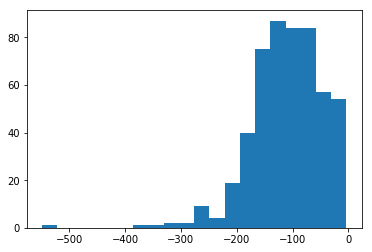

In [219]:
_ = plt.hist(relative_radial_vel[ii], bins=20)

372.0544125804941 162.24124093693547
[207.57226188 358.84870023 526.3811029 ]


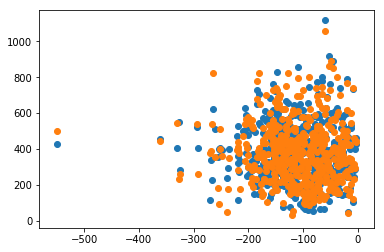

In [220]:
plt.scatter(relative_radial_vel[ii], vel_A[ii])
plt.scatter(relative_radial_vel[ii], vel_B[ii])
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))
print(np.percentile(vel_A[ii], [16,50,84]))

372.0544125804941 162.24124093693547
[207.57226188 358.84870023 526.3811029 ]


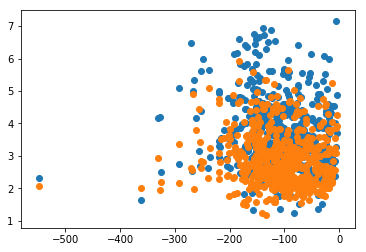

In [221]:
plt.scatter(relative_radial_vel[ii], galaxy_A['Mstar'][ii])
plt.scatter(relative_radial_vel[ii], galaxy_B['Mstar'][ii])
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))
print(np.percentile(vel_A[ii], [16,50,84]))

372.0544125804941 162.24124093693547
[207.57226188 358.84870023 526.3811029 ]


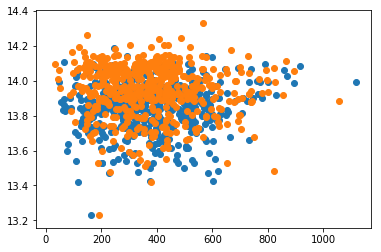

In [222]:
plt.scatter(vel_A[ii], np.log10(galaxy_A['MFOF'][ii])+10)
plt.scatter(vel_B[ii], np.log10(galaxy_B['MFOF'][ii])+10)
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))
print(np.percentile(vel_A[ii], [16,50,84]))

372.0544125804941 162.24124093693547
[207.57226188 358.84870023 526.3811029 ]


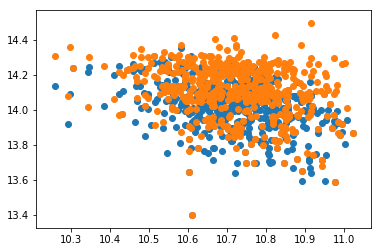

In [223]:
plt.scatter(np.log10(galaxy_A['Mstar'][ii]/0.68)+10, np.log10(galaxy_A['MFOF'][ii]/0.68)+10)
plt.scatter(np.log10(galaxy_A['Mstar'][ii]/0.68)+10, np.log10(galaxy_B['MFOF'][ii]/0.68)+10)
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))
print(np.percentile(vel_A[ii], [16,50,84]))

372.0544125804941 162.24124093693547


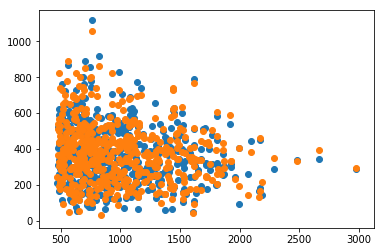

In [224]:
plt.scatter(relative_pos[ii], vel_A[ii])
plt.scatter(relative_pos[ii], vel_B[ii])
print(np.mean(vel_A[ii]), np.std(vel_A[ii]))

In [225]:
print(np.count_nonzero(ii))

520


In [226]:
sorted_vel_A = np.sort(vel_A[ii])
sorted_vel_B = np.sort(vel_B[ii])
integrated = np.linspace(1.0, 0.0, len(sorted_vel_A))

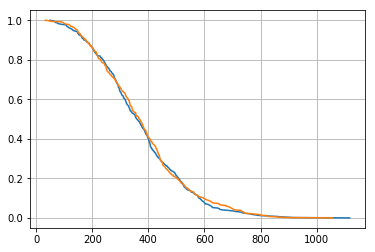

In [227]:
plt.plot(sorted_vel_A, integrated)
plt.plot(sorted_vel_B, integrated)
plt.grid()

In [228]:
sorted_vmax_A = np.sort(galaxy_A['vmax'][jj])
sorted_vmax_B = np.sort(galaxy_B['vmax'][jj])
integrated = np.linspace(1.0, 0.0, len(sorted_vmax_A))

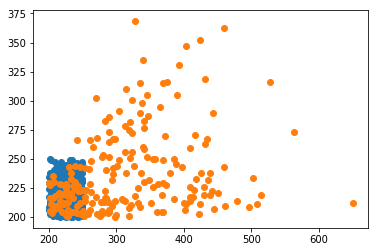

In [229]:
plt.scatter(galaxy_A['vmax'][ii], galaxy_B['vmax'][ii])
plt.scatter(galaxy_A['vmax'][jj], galaxy_B['vmax'][jj])

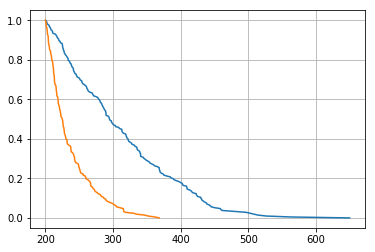

In [230]:
plt.plot(sorted_vmax_A, integrated)
plt.plot(sorted_vmax_B, integrated)
plt.grid()

In [231]:
sorted_mfof_A = np.sort(galaxy_A['MFOF'][jj])
sorted_mfof_B = np.sort(galaxy_B['MFOF'][jj])
integrated = np.linspace(1.0, 0.0, len(sorted_mfof_A))

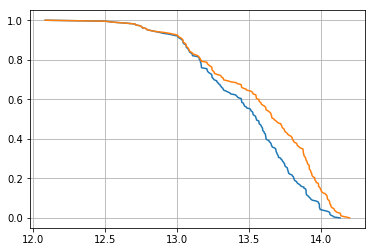

In [232]:
plt.plot(np.log10(sorted_mfof_A)+10, integrated)
plt.plot(np.log10(sorted_mfof_B)+10, integrated)
plt.grid()